## 実践Python スクレイピングと可視化

今日お伝えしたことをスクレイピングと可視化をしながら学びます

### すること
1. `download` ディレクトリに格納している開店閉店情報をスクレイピング
1. データを前処理
1. 可視化

### しないこと
- html コンテンツのダウンロード
    - 時間がかかるし、みんながアクセスすると迷惑になるのでダウンロードしておきました。download ディレクトリに格納しています
    - ダウンロードのスクリプトは `src/download.py` に書いています

### memo

- jupyter notebook では cell の最後に記述したコードの返り値が表示されます


## ダウンロードした [開店閉店](https://kaiten-heiten.com/)情報htmlをスクレイピング

- リスト化されている開店閉店情報から、日付け、カテゴリー、店名、URLを取得する
- python で scraping する時のライブラリはだいたい `BeautifulSoup` を使う
    - [Beautiful Soup Documentation — Beautiful Soup 4.9.0 documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)



In [1]:
# cell の大きさを100％にする
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# 使いたいライブラリやモジュールをインポート
from bs4 import BeautifulSoup

### contents を 読み込む
- 今日やったところ
    - [ ] 関数
    - [ ] メソッド

In [7]:
# htmlファイルを開いて、中身を読み込む
# open関数：引数に渡されたファイルパスのファイルを読み込んでファイル風オブジェクトを返す関数
# .read() メソッド: ファイル風オブジェクトがファイルの中身(データ)を文字列で返すメソッド
html = open("../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_1_.html").read()
print(type(html))


<class 'str'>


### コンテンツを スクレイピングするために beautifulsoup オブジェクトに変換
- 今日やったところ
    - [ ] クラス
    - [ ] クラスのインスタンス化
    - [ ] クラスの初期値設定

In [8]:
# BeautifulSoup クラス：　
#   初期値にスクレイピングしたいコンテンツと、パーサーを指定してインスタンス化すると、BeautifulSoupインスタンスオブジェクトを返す

soup = BeautifulSoup(
    html, # スクレイピングしたいコンテンツ
    'html.parser'  #パーサーの指定
)

print(type(soup))

<class 'bs4.BeautifulSoup'>


### beautifulsoup オブジェクトのメソッドを使って情報を抽出
今回は、CSSの情報を元にデータを抽出

- 今日やったところ
    - [ ] オブジェクト
    - [ ] オブジェクトが持つメソッドを確認 dir

In [9]:
# soup オブジェクトが持つアトリビュートを確認 
# 各メソッドなどの説明は https://www.crummy.com/software/BeautifulSoup/bs4/ をみてね
print(dir(soup))

['ASCII_SPACES', 'DEFAULT_BUILDER_FEATURES', 'NO_PARSER_SPECIFIED_WARNING', 'ROOT_TAG_NAME', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_check_markup_is_url', '_decode_markup', '_feed', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_linkage_fixer', '_most_recent_element', '_namespaces', '_popToTag', '_should_pretty_print', 'append', 'attrs', 'builder', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator', 'children', 'clear', 'contains_replacement_characters', 'co

1. `_category_kantou_koushinetsu_tokyo_page_1_.html`をブラウザで開いて、デベロッパーツールを開く
1. inspector ボタンを押してブラウザ上で必要な情報の詳細を得る。
1. お店1つずつの情報が `article` というタグにまとまってたのでこれを[css-selector](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors) をつかって取得する．
    - `.select()` メソッドを使う
    - 引数にはタグ名、クラス名、IDなどを渡す
    



In [10]:
# .select()メソッド： soupオブジェクトが持つデータで、 article タグを持つデータをリストで返すメソッド
soup.select("article")

[<article class="list col-md-12 post-287548 post type-post status-publish format-standard has-post-thumbnail hentry category-coffie category-tokyo category-close category-kantou_koushinetsu category-restaurant">
 <a class="post_links" href="https://kaiten-heiten.com/ginza-renoir-ginza2chome/" title="【閉店】喫茶室ルノアール 銀座2丁目店">
 <div class="list-block">
 <div class="post_thumb" style="background-image: url('https://i2.wp.com/kaiten-heiten.com/wp-content/uploads/images/2021/09/004-6.jpg?fit=640%2C399&amp;ssl=1')"><span> </span></div>
 <div class="list-text">
 <span class="post_time"><i class="icon icon-clock"></i> 2021-09-01</span>
 <span class="post_cat"><i class="icon icon-folder"></i> コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店</span> <h3 class="list-title post_ttl">【閉店】喫茶室ルノアール 銀座2丁目店</h3>
 </div>
 </div>
 </a>
 </article>,
 <article class="list col-md-12 post-287529 post type-post status-publish format-standard has-post-thumbnail hentry category-shop category-tokyo category-clothing-shop category-clo

In [11]:
# 最初の1つだけほしい場合は、リストのインデックス指定か、`.select_one()` メソッドを使う
soup.select("article")[0]
soup.select_one("article") 

<article class="list col-md-12 post-287548 post type-post status-publish format-standard has-post-thumbnail hentry category-coffie category-tokyo category-close category-kantou_koushinetsu category-restaurant">
<a class="post_links" href="https://kaiten-heiten.com/ginza-renoir-ginza2chome/" title="【閉店】喫茶室ルノアール 銀座2丁目店">
<div class="list-block">
<div class="post_thumb" style="background-image: url('https://i2.wp.com/kaiten-heiten.com/wp-content/uploads/images/2021/09/004-6.jpg?fit=640%2C399&amp;ssl=1')"><span> </span></div>
<div class="list-text">
<span class="post_time"><i class="icon icon-clock"></i> 2021-09-01</span>
<span class="post_cat"><i class="icon icon-folder"></i> コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店</span> <h3 class="list-title post_ttl">【閉店】喫茶室ルノアール 銀座2丁目店</h3>
</div>
</div>
</a>
</article>

In [13]:
# 各要素は bs4.element.Tag オブジェクト
print(type(soup.select("article")[0]))


<class 'bs4.element.Tag'>


In [15]:
# オブジェクトなんだからメソッド持ってるよね？と確認すると使えそうなやつがたくさん用意されている
print(dir(soup.select("article")[0]))


['__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_should_pretty_print', 'append', 'attrs', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator', 'children', 'clear', 'contents', 'decode', 'decode_contents', 'decompose', 'decomposed', 'descendants', 'encode', 'encode_contents', 'extend', 'extract', 'fetchNextSiblings', 'fetchParents', 'fetchPrevious', 'fetchPreviousSiblings', 'find', 'findAll', 'findAllNext', 'findAllPrevious', 'findChild', 

article タグの中を確認してみる

```html
<article class="list col-md-12 post-287548 post type-post status-publish format-standard has-post-thumbnail hentry category-coffie category-tokyo category-close category-kantou_koushinetsu category-restaurant">
    <a class="post_links" href="https://kaiten-heiten.com/ginza-renoir-ginza2chome/" title="【閉店】喫茶室ルノアール 銀座2丁目店">
        <div class="list-block">
            <div class="post_thumb" style="background-image: url('https://i2.wp.com/kaiten-heiten.com/wp-content/uploads/images/2021/09/004-6.jpg?fit=640%2C399&amp;ssl=1')"><span> </span></div>
            <div class="list-text">
                <span class="post_time"><i class="icon icon-clock"></i> 2021-09-01</span>
                <span class="post_cat"><i class="icon icon-folder"></i> コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店</span> 
                <h3 class="list-title post_ttl">【閉店】喫茶室ルノアール 銀座2丁目店</h3>
            </div>
        </div>
    </a>
</article>
```
- `a` タグの中で
    - `title` アトリビュートで店名
    - `<span class="post_time">` で日付け
    - `<span class="post_cat">` でカテゴリ
- `class=` 属性でカテゴリーリスト
- このデータを持つ `bs4.element.Tag` オブジェクトをメソッドで操作していけば、ほしいデータが抽出出来る

In [16]:
# .select_one() メソッドで `a` タグオブジェクトを取得
a = soup.select("article")[0].select_one("a")


In [18]:
print(type(a))

print(dir(a))


<class 'bs4.element.Tag'>
['__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_should_pretty_print', 'append', 'attrs', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator', 'children', 'clear', 'contents', 'decode', 'decode_contents', 'decompose', 'decomposed', 'descendants', 'encode', 'encode_contents', 'extend', 'extract', 'fetchNextSiblings', 'fetchParents', 'fetchPrevious', 'fetchPreviousSiblings', 'find', 'findAll', 'findAllNext', 'findA

In [19]:
# タグオブジェクトのメソッド .get() で指定の属性情報を取得
a.get("title")


'【閉店】喫茶室ルノアール 銀座2丁目店'

In [21]:
# タグオブジェクトのメソッド .select_one() で タグとcssを指定し該当のオブジェクトを取得、その後テキスト部分だけ取得する .get_text() メソッドでテキストデータを取得
a.select_one("span.post_time").get_text()

' 2021-09-01'

In [22]:
# 同上
a.select_one("span.post_cat").get_text()

' コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店'

次に class の中のカテゴリーを取っていきます
```html
<article class="list col-md-12 post-287548 post type-post status-publish format-standard has-post-thumbnail hentry category-coffie category-tokyo category-close category-kantou_koushinetsu category-restaurant">
```


In [23]:
# soup オブジェクトの .get() メソッドをつかって class の属性情報をリストで取得
# class の中身全部がカテゴリーではない
soup.select("article")[0].get("class")

['list',
 'col-md-12',
 'post-287548',
 'post',
 'type-post',
 'status-publish',
 'format-standard',
 'has-post-thumbnail',
 'hentry',
 'category-coffie',
 'category-tokyo',
 'category-close',
 'category-kantou_koushinetsu',
 'category-restaurant']

In [24]:
# 「category-」　という文字列が入っていない文字列は除去したい
# 文字列オブジェクトが持つ .find() メソッドを使うと、引数に渡した文字列が入っているならばその位置を、入っていなければ-1を返す
'category-coffie'.find("category")

0

In [25]:
'post-287548'.find("category")

-1

In [26]:
# これをcategoryだけのリストを作成
l = list()
for cat in soup.select("article")[0].get("class"):
    if cat.find("category") > -1:
        l.append(cat)
print(l)
        

['category-coffie', 'category-tokyo', 'category-close', 'category-kantou_koushinetsu', 'category-restaurant']


- 今日やったところ
    - [ ] 内包表記（ちょっとバージョンアップ版）


In [27]:
# 条件付きリスト内包表記
l = [cat for cat in soup.select("article")[0].get("class") if cat.find("category") > -1]
print(l)

['category-coffie', 'category-tokyo', 'category-close', 'category-kantou_koushinetsu', 'category-restaurant']


In [28]:
# いままでのをまとめて関数にする
# 返り値は辞書に入れる

def get_details(soup):
    """
    soup: soup.select_one("article") もしくは、soup.select("article")[0] を想定
    """
    soup_a = soup.select_one("a")
    name = soup_a.get("title")
    post_time = soup_a.select_one("span.post_time").get_text()
    url = soup_a.get("href")
    category = soup_a.select_one("span.post_cat").get_text()

    category_tag = [cat for cat in  soup.get("class") if cat.find("category") > -1]# 

    return {
        "name":name, 
        "post_time":post_time,
        "url":url,
        "category":category,
        "category_tag":category_tag}

In [30]:
# テスト
get_details(soup.select("article")[0])

{'name': '【閉店】喫茶室ルノアール 銀座2丁目店',
 'post_time': ' 2021-09-01',
 'url': 'https://kaiten-heiten.com/ginza-renoir-ginza2chome/',
 'category': ' コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店',
 'category_tag': ['category-coffie',
  'category-tokyo',
  'category-close',
  'category-kantou_koushinetsu',
  'category-restaurant']}

In [31]:
# これを article タグのデータ全てに適用する
[get_details(article) for article in soup.select("article")]

[{'name': '【閉店】喫茶室ルノアール 銀座2丁目店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/ginza-renoir-ginza2chome/',
  'category': ' コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店',
  'category_tag': ['category-coffie',
   'category-tokyo',
   'category-close',
   'category-kantou_koushinetsu',
   'category-restaurant']},
 {'name': '【閉店】Right-on（ライトオン）上野店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/right-on-ueno/',
  'category': ' 小売店, 東京, 洋服, 閉店情報, 関東・甲信越',
  'category_tag': ['category-shop',
   'category-tokyo',
   'category-clothing-shop',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】丸亀製麺 天王洲アイル店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/marugameseimen-tennouzu-isle/',
  'category': ' そば・うどん店, 東京, 開店情報, 関東・甲信越, 飲食店',
  'category_tag': ['category-soba_udon',
   'category-tokyo',
   'category-open',
   'category-kantou_koushinetsu',
   'category-restaurant']},
 {'name': '【閉店】フジヤ時計店',
  'post_time': ' 2021-08-30',


In [32]:
# html ファイルを引数にとってスクレイピングして辞書リストを返す関数を定義
def fetch_all(f):
    html = open(f).read()
    soup = BeautifulSoup(html, 'html.parser')
    return [get_details(article) for article in soup.select("article")]
    


In [33]:
# test
fetch_all("../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_1_.html")


[{'name': '【閉店】喫茶室ルノアール 銀座2丁目店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/ginza-renoir-ginza2chome/',
  'category': ' コーヒーショップ, 東京, 閉店情報, 関東・甲信越, 飲食店',
  'category_tag': ['category-coffie',
   'category-tokyo',
   'category-close',
   'category-kantou_koushinetsu',
   'category-restaurant']},
 {'name': '【閉店】Right-on（ライトオン）上野店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/right-on-ueno/',
  'category': ' 小売店, 東京, 洋服, 閉店情報, 関東・甲信越',
  'category_tag': ['category-shop',
   'category-tokyo',
   'category-clothing-shop',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】丸亀製麺 天王洲アイル店',
  'post_time': ' 2021-09-01',
  'url': 'https://kaiten-heiten.com/marugameseimen-tennouzu-isle/',
  'category': ' そば・うどん店, 東京, 開店情報, 関東・甲信越, 飲食店',
  'category_tag': ['category-soba_udon',
   'category-tokyo',
   'category-open',
   'category-kantou_koushinetsu',
   'category-restaurant']},
 {'name': '【閉店】フジヤ時計店',
  'post_time': ' 2021-08-30',


## `download` ディレクトリに入っている全ファイルをスクレイピング

### ファイルリストを取得

`download` ホルダにダウンロードしている全htmlファイルに get_details関数を適用してデータを取得
- 今日やったところ
    - [ ] 組み込みクラスのインポートとインスタンス化


In [34]:
# glob --- Unix 形式のパス名のパターン展開 https://docs.python.org/ja/3/library/glob.html

import glob 
# 【閉店】ディレクトリに入っているファイルをワイルドカードで指定。当てはまるフルパスをリストで返す
print(glob.glob("../download/【閉店】/*.html"))



['../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_28_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_51_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_10_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_41_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_38_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_18_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_36_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_16_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_17_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_2_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_11_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_31_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_43_.html', '../download/【閉店】/_category_kantou_koushinetsu_tokyo_page_32_.html', '../download/【閉店】/_category_kantou

In [35]:
# このまますると、二重リストになる
[fetch_all(f) for f in glob.glob("../download/【閉店】/*.html")[:3]]

    


[[{'name': '【閉店】とらのあな秋葉原店Ｂ',
   'post_time': ' 2021-03-05',
   'url': 'https://kaiten-heiten.com/toranoana-akihabara%ef%bd%82/',
   'category': ' 同人ショップ, 小売店, 東京, 閉店情報, 関東・甲信越',
   'category_tag': ['category-8846',
    'category-shop',
    'category-tokyo',
    'category-close',
    'category-kantou_koushinetsu']},
  {'name': '【閉店】ハードオフ 下北沢店',
   'post_time': ' 2021-03-05',
   'url': 'https://kaiten-heiten.com/hardoff-shimokitazawa/',
   'category': ' サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越',
   'category_tag': ['category-service',
    'category-tokyo',
    'category-pawnbroker',
    'category-close',
    'category-kantou_koushinetsu']},
  {'name': '【閉店】ハードオフ/オフハウス/ホビーオフ 多摩ニュータウン店',
   'post_time': ' 2021-03-05',
   'url': 'https://kaiten-heiten.com/hardoff-offhouse-hobyoff-tamanewtown/',
   'category': ' サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越',
   'category_tag': ['category-service',
    'category-tokyo',
    'category-pawnbroker',
    'category-close',
    'category-kantou_koushinetsu']},
  {'name': '【

In [36]:
# こういう時は flatten 
# itertools に入っている chain.from_iterable クラスにネストしたデータを渡すとイテレータオブジェクトを返す
import itertools
itertools.chain.from_iterable([fetch_all(f) for f in glob.glob("../download/【閉店】/*.html")[:3]])


In [37]:
# イテレータオブジェクトは list 関数に渡すと、リストになる
list(itertools.chain.from_iterable([fetch_all(f) for f in glob.glob("../download/【閉店】/*.html")[:3]]))

[{'name': '【閉店】とらのあな秋葉原店Ｂ',
  'post_time': ' 2021-03-05',
  'url': 'https://kaiten-heiten.com/toranoana-akihabara%ef%bd%82/',
  'category': ' 同人ショップ, 小売店, 東京, 閉店情報, 関東・甲信越',
  'category_tag': ['category-8846',
   'category-shop',
   'category-tokyo',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】ハードオフ 下北沢店',
  'post_time': ' 2021-03-05',
  'url': 'https://kaiten-heiten.com/hardoff-shimokitazawa/',
  'category': ' サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越',
  'category_tag': ['category-service',
   'category-tokyo',
   'category-pawnbroker',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】ハードオフ/オフハウス/ホビーオフ 多摩ニュータウン店',
  'post_time': ' 2021-03-05',
  'url': 'https://kaiten-heiten.com/hardoff-offhouse-hobyoff-tamanewtown/',
  'category': ' サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越',
  'category_tag': ['category-service',
   'category-tokyo',
   'category-pawnbroker',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】マイ スペース アスピア',
  'post_ti

In [38]:
# ここまでを関数化
# html のファイルリストを渡したら辞書データのリストを返す関数を定義

def html_to_data(file_list):
    return list(itertools.chain.from_iterable([fetch_all(f) for f in file_list]))

In [39]:
# test 
heiten_files = glob.glob("../download/【閉店】/*.html")
html_to_data(heiten_files)

[{'name': '【閉店】とらのあな秋葉原店Ｂ',
  'post_time': ' 2021-03-05',
  'url': 'https://kaiten-heiten.com/toranoana-akihabara%ef%bd%82/',
  'category': ' 同人ショップ, 小売店, 東京, 閉店情報, 関東・甲信越',
  'category_tag': ['category-8846',
   'category-shop',
   'category-tokyo',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】ハードオフ 下北沢店',
  'post_time': ' 2021-03-05',
  'url': 'https://kaiten-heiten.com/hardoff-shimokitazawa/',
  'category': ' サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越',
  'category_tag': ['category-service',
   'category-tokyo',
   'category-pawnbroker',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】ハードオフ/オフハウス/ホビーオフ 多摩ニュータウン店',
  'post_time': ' 2021-03-05',
  'url': 'https://kaiten-heiten.com/hardoff-offhouse-hobyoff-tamanewtown/',
  'category': ' サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越',
  'category_tag': ['category-service',
   'category-tokyo',
   'category-pawnbroker',
   'category-close',
   'category-kantou_koushinetsu']},
 {'name': '【閉店】マイ スペース アスピア',
  'post_ti

## データの前処理
- pandasを使ってデータを前処理する
- pandas のかんたんなチュートリアルは こちらをどうぞ[10 minutes to pandas — pandas 1.3.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- いろいろ深く勉強したい人は [改訂版　Pythonユーザのための Jupyter［実践］入門](https://www.amazon.co.jp/dp/B08G1HYL9P) がオススメです




In [40]:
import pandas as pd


### なぜデータを辞書型にしてリストに格納したのか？

pandas の DataFrame クラスは、同じデータキーワードを持つデータのリストを渡すと、キーワードをコラムにしてDataFrameで返します。辞書型にしてリストのデータを作った理由はここにあります。


In [41]:
heitens = html_to_data(heiten_files)


In [42]:
df = pd.DataFrame(heitens)

In [43]:
# DataFrame オブジェクトの .head() メソッド：最初の五行だけ表示
df.head()

,name,post_time,url,category,category_tag
0,【閉店】とらのあな秋葉原店Ｂ,2021-03-05,https://kaiten-heiten.com/toranoana-akihabara%...,"同人ショップ, 小売店, 東京, 閉店情報, 関東・甲信越","[category-8846, category-shop, category-tokyo,..."
1,【閉店】ハードオフ 下北沢店,2021-03-05,https://kaiten-heiten.com/hardoff-shimokitazawa/,"サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越","[category-service, category-tokyo, category-pa..."
2,【閉店】ハードオフ/オフハウス/ホビーオフ 多摩ニュータウン店,2021-03-05,https://kaiten-heiten.com/hardoff-offhouse-hob...,"サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越","[category-service, category-tokyo, category-pa..."
3,【閉店】マイ スペース アスピア,2021-03-04,https://kaiten-heiten.com/aspia/,"ブログ, レンタル, レンタルスタジオ, 東京, 閉店情報, 関東・甲信越","[category-blog, category-rental, category-stud..."
4,【閉店】ホテルビスタプレミオ東京［赤坂］,2021-03-04,https://kaiten-heiten.com/hotel-vista-tokyo-ak...,"ホテル・ビジネスホテル, 東京, 観光・宿泊・レジャー, 閉店情報, 関東・甲信越","[category-hotel-businesshotel, category-tokyo,..."


In [44]:
# .info() メソッド。各コラムのデータ情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1344 non-null   object
 1   post_time     1344 non-null   object
 2   url           1344 non-null   object
 3   category      1344 non-null   object
 4   category_tag  1344 non-null   object
dtypes: object(5)
memory usage: 52.6+ KB


### 時系列データは、日時情報を index に持つのが吉

- 開店閉店情報は時系列情報です。よって日付け情報である `post_time` を時系列インデックスに変換していたほうがいろいろ幸せなことが多いと思います。
- `post_time` の型（⇑のDtype）は object になっています。DataFrameで object とは文字列のことです。
- これを Pandas の `to_datetime()` メソッドでDateTime型へ変換します。
- その後、DataFrame の `set_index()` メソッドで `post_time`をDataFrame のインデックスにします

In [45]:
# datetime64 型へ変換して上書き
df["post_time"] = pd.to_datetime(df["post_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          1344 non-null   object        
 1   post_time     1344 non-null   datetime64[ns]
 2   url           1344 non-null   object        
 3   category      1344 non-null   object        
 4   category_tag  1344 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 52.6+ KB


In [46]:
# 見た目にはあまり変わらない
df.head()

,name,post_time,url,category,category_tag
0,【閉店】とらのあな秋葉原店Ｂ,2021-03-05,https://kaiten-heiten.com/toranoana-akihabara%...,"同人ショップ, 小売店, 東京, 閉店情報, 関東・甲信越","[category-8846, category-shop, category-tokyo,..."
1,【閉店】ハードオフ 下北沢店,2021-03-05,https://kaiten-heiten.com/hardoff-shimokitazawa/,"サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越","[category-service, category-tokyo, category-pa..."
2,【閉店】ハードオフ/オフハウス/ホビーオフ 多摩ニュータウン店,2021-03-05,https://kaiten-heiten.com/hardoff-offhouse-hob...,"サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越","[category-service, category-tokyo, category-pa..."
3,【閉店】マイ スペース アスピア,2021-03-04,https://kaiten-heiten.com/aspia/,"ブログ, レンタル, レンタルスタジオ, 東京, 閉店情報, 関東・甲信越","[category-blog, category-rental, category-stud..."
4,【閉店】ホテルビスタプレミオ東京［赤坂］,2021-03-04,https://kaiten-heiten.com/hotel-vista-tokyo-ak...,"ホテル・ビジネスホテル, 東京, 観光・宿泊・レジャー, 閉店情報, 関東・甲信越","[category-hotel-businesshotel, category-tokyo,..."


In [47]:
# post_time を このDataFrameのインデックスにします
# .set_index() ： DataFrame オブジェクトが持つ .set_index() メソッド。コラム名を渡してそのコラムをIndexにした新しいDataFrameを返す
# ただし、inplace=True オプションを渡すと、元のDataFrameのデータを書き換え（上書き）する

df.set_index("post_time", inplace=True)


In [48]:
df.head()

,name,url,category,category_tag
post_time,,,,
2021-03-05,【閉店】とらのあな秋葉原店Ｂ,https://kaiten-heiten.com/toranoana-akihabara%...,"同人ショップ, 小売店, 東京, 閉店情報, 関東・甲信越","[category-8846, category-shop, category-tokyo,..."
2021-03-05,【閉店】ハードオフ 下北沢店,https://kaiten-heiten.com/hardoff-shimokitazawa/,"サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越","[category-service, category-tokyo, category-pa..."
2021-03-05,【閉店】ハードオフ/オフハウス/ホビーオフ 多摩ニュータウン店,https://kaiten-heiten.com/hardoff-offhouse-hob...,"サービス, 東京, 買取・質屋, 閉店情報, 関東・甲信越","[category-service, category-tokyo, category-pa..."
2021-03-04,【閉店】マイ スペース アスピア,https://kaiten-heiten.com/aspia/,"ブログ, レンタル, レンタルスタジオ, 東京, 閉店情報, 関東・甲信越","[category-blog, category-rental, category-stud..."
2021-03-04,【閉店】ホテルビスタプレミオ東京［赤坂］,https://kaiten-heiten.com/hotel-vista-tokyo-ak...,"ホテル・ビジネスホテル, 東京, 観光・宿泊・レジャー, 閉店情報, 関東・甲信越","[category-hotel-businesshotel, category-tokyo,..."


In [49]:
# .sort_index() メソッド： インデックスで並び替えした新しいDataFrameを返す
# ただし、inplace=True オプションを渡すと、元のDataFrameのデータを書き換え（上書き）する
df.sort_index(inplace=True)

In [50]:
df.head()

,name,url,category,category_tag
post_time,,,,
2020-11-28,【閉店】広東料理 銀座 楼蘭,https://kaiten-heiten.com/ginza-rouran/,"中華料理・餃子, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-chaina, category-tokyo, category-clo..."
2020-11-28,【閉店】19TEA,https://kaiten-heiten.com/19tea/,"カフェ・レストラン, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-cafe-restaurant, category-tokyo, cat..."
2020-11-28,【閉店】あいりぺ東急ハンズ渋谷店,https://kaiten-heiten.com/irepairs-shibuyastore/,"サービス, 修理・リサイクル, 東京, 閉店情報, 関東・甲信越","[category-service, category-repair-recycling, ..."
2020-11-28,【閉店】アユンテラス,https://kaiten-heiten.com/ayung-teras/,"アジア・エスニック, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-6629, category-tokyo, category-close..."
2020-11-28,【閉店】薬局くすりの福太郎 飯田橋1丁目店,https://kaiten-heiten.com/y-kusurinofukutaro-i...,"ドラッグストア・調剤薬局, 小売店, 東京, 閉店情報, 関東・甲信越","[category-drug-store, category-shop, category-..."


In [51]:
# これまでの処理を関数化します
def data_to_dataframe(data):
    """
    data は html_to_data で変換されたリストデータ
    """
    df = pd.DataFrame(data)
    df["post_time"] = pd.to_datetime(df["post_time"])
    df.set_index("post_time", inplace=True)
    df.sort_index(inplace=True)
    return df 
    
    

In [52]:
# test
df_heiten = data_to_dataframe(heitens)
df_heiten.head()

,name,url,category,category_tag
post_time,,,,
2020-11-28,【閉店】広東料理 銀座 楼蘭,https://kaiten-heiten.com/ginza-rouran/,"中華料理・餃子, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-chaina, category-tokyo, category-clo..."
2020-11-28,【閉店】19TEA,https://kaiten-heiten.com/19tea/,"カフェ・レストラン, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-cafe-restaurant, category-tokyo, cat..."
2020-11-28,【閉店】あいりぺ東急ハンズ渋谷店,https://kaiten-heiten.com/irepairs-shibuyastore/,"サービス, 修理・リサイクル, 東京, 閉店情報, 関東・甲信越","[category-service, category-repair-recycling, ..."
2020-11-28,【閉店】アユンテラス,https://kaiten-heiten.com/ayung-teras/,"アジア・エスニック, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-6629, category-tokyo, category-close..."
2020-11-28,【閉店】薬局くすりの福太郎 飯田橋1丁目店,https://kaiten-heiten.com/y-kusurinofukutaro-i...,"ドラッグストア・調剤薬局, 小売店, 東京, 閉店情報, 関東・甲信越","[category-drug-store, category-shop, category-..."


## 可視化

- DataFrameが持つメソッドを駆使して可視化しましょう

In [53]:
# .resample() メソッド：　DataFrameが持つIndex情報を元にデータをリサンプリングしてResamplerオブジェクトを返す
df_heiten.resample("M") # M は月ごとにデータをリサンプリング

In [55]:
# Resampler オブジェクトのメソッドを確認
print(dir(df_heiten.resample("M")))

['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_adjust_binner_for_upsample', '_agg_examples_doc', '_agg_see_also_doc', '_apply_allowlist', '_apply_loffset', '_attributes', '_constructor', '_convert_obj', '_dir_additions', '_dir_deletions', '_downsample', '_from_selection', '_get_binner', '_get_binner_for_time', '_get_index', '_get_indices', '_get_resampler_for_grouping', '_gotitem', '_group_selection', '_groupby_and_aggregate', '_hidden_attrs', '_internal_names', '_internal_names_set', '_is_protocol', '_obj_with_exclusions', '_resampler_fo

In [56]:
# Resampler オブジェクト の .count() メソッド: リサンプリングデータの数をDataFrameで返す
# つまり、毎月閉店した数を得ることが出来る
df_heiten.resample("M").count()

,name,url,category,category_tag
post_time,,,,
2020-11-30,13,13,13,13
2020-12-31,224,224,224,224
2021-01-31,221,221,221,221
2021-02-28,216,216,216,216
2021-03-31,120,120,120,120
2021-04-30,108,108,108,108
2021-05-31,140,140,140,140
2021-06-30,94,94,94,94
2021-07-31,104,104,104,104


<AxesSubplot:xlabel='post_time'>

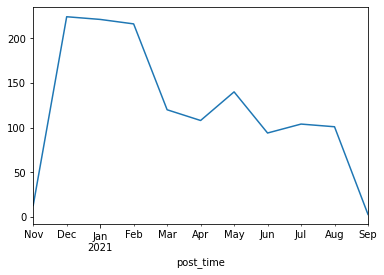

In [57]:
# .count() メソッドは、DataFrameを返すので、DataFrameオブジェクトのメソッドが使える
# .plot() で描画しましょう

# どのコラムも同じ数字なので代表で "name" だけで描画
df_heiten.resample("M").count()["name"].plot()

<AxesSubplot:xlabel='post_time'>

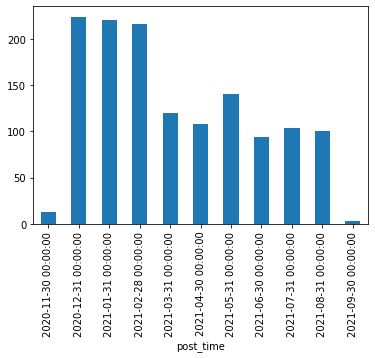

In [58]:
# 年越せなかった店(2020/12月)と、頑張って越したけど非常事態宣言で耐えれなくなった店(2021/1,2月)、って感じですかね？
# ただ、3月以降は急に減ってますよね。
df_heiten.resample("M").count()["name"].plot(kind="bar")

In [59]:
# resampler オブジェクトはから、各月のデータを取り出したい時ってあります。
df_heiten.resample("M")

In [ ]:
# そういう時は list 関数に渡せばいけます
# ただし、[(resample 月の月末日 datetime オブジェクト, その月のDataFrame)] という形で返されます。ちょっと読みづらい
list(df_heiten.resample("M"))

In [61]:
# 初月のデータをとるには リストの添字を渡す必要がある
list(df_heiten.resample("M"))[0][1]

,name,url,category,category_tag
post_time,,,,
2020-11-28,【閉店】広東料理 銀座 楼蘭,https://kaiten-heiten.com/ginza-rouran/,"中華料理・餃子, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-chaina, category-tokyo, category-clo..."
2020-11-28,【閉店】19TEA,https://kaiten-heiten.com/19tea/,"カフェ・レストラン, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-cafe-restaurant, category-tokyo, cat..."
2020-11-28,【閉店】あいりぺ東急ハンズ渋谷店,https://kaiten-heiten.com/irepairs-shibuyastore/,"サービス, 修理・リサイクル, 東京, 閉店情報, 関東・甲信越","[category-service, category-repair-recycling, ..."
2020-11-28,【閉店】アユンテラス,https://kaiten-heiten.com/ayung-teras/,"アジア・エスニック, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-6629, category-tokyo, category-close..."
2020-11-28,【閉店】薬局くすりの福太郎 飯田橋1丁目店,https://kaiten-heiten.com/y-kusurinofukutaro-i...,"ドラッグストア・調剤薬局, 小売店, 東京, 閉店情報, 関東・甲信越","[category-drug-store, category-shop, category-..."
2020-11-28,【閉店】ギャラリー川野,https://kaiten-heiten.com/gallery-kawano/,"和服, 小売店, 東京, 閉店情報, 関東・甲信越","[category-wafuku, category-shop, category-toky..."
2020-11-29,【閉店】TOBICHI東京,https://kaiten-heiten.com/tobichi-tokyo/,"オフィシャルグッズストア, 小売店, 東京, 閉店情報, 関東・甲信越","[category-idol-goods, category-shop, category-..."
2020-11-29,【閉店】麹町カフェ,https://kaiten-heiten.com/kojimachi-cafe/,"カフェ・レストラン, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-cafe-restaurant, category-tokyo, cat..."
2020-11-29,【閉店】HARE GINZA,https://kaiten-heiten.com/hare-ginza/,"カレー店, 東京, 閉店情報, 関東・甲信越, 飲食店","[category-curry, category-tokyo, category-clos..."


- 今日やったところ
    - [ ] アンパック代入


In [62]:
# こういう時アンパック代入が便利
for dt, df in list(df_heiten.resample("M")):
    print(dt, len(df)) 

2020-11-30 00:00:00 13
2020-12-31 00:00:00 224
2021-01-31 00:00:00 221
2021-02-28 00:00:00 216
2021-03-31 00:00:00 120
2021-04-30 00:00:00 108
2021-05-31 00:00:00 140
2021-06-30 00:00:00 94
2021-07-31 00:00:00 104
2021-08-31 00:00:00 101
2021-09-30 00:00:00 3


In [63]:
# 各月の"飲食店"だけカウント
for dt, df in list(df_heiten.resample("M")):
    inshokuten = len(df[df["category"].str.find("飲食店")>-1])
    print(dt, inshokuten) 

2020-11-30 00:00:00 8
2020-12-31 00:00:00 137
2021-01-31 00:00:00 117
2021-02-28 00:00:00 103
2021-03-31 00:00:00 51
2021-04-30 00:00:00 69
2021-05-31 00:00:00 86
2021-06-30 00:00:00 51
2021-07-31 00:00:00 43
2021-08-31 00:00:00 43
2021-09-30 00:00:00 2
